In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve
import models.evaluate_models
from models.train_model import *
from models.evaluate_models import print_metrics
from preprocessing.preprocessing import *
import importlib
import models.train_model
import models.evaluate_models
import config_module.config
import config_module.config 
import preprocessing.preprocessing
importlib.reload(models.train_model) 
importlib.reload(models.evaluate_models) 
importlib.reload(preprocessing.preprocessing)
importlib.reload(config_module.config)

<module 'config_module.config' from 'c:\\Users\\Acer\\source\\repos\\homework\\Python\\WebVulnerabilities\\config_module\\config.py'>

In [2]:
def heatmap( model_name, y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomalous'], yticklabels=['Hợp lệ', 'Độc hại'])
    plt.title(f'Confusion Matrix trên tập test ({model_name})')
    plt.xlabel('Prediction')
    plt.ylabel('Reality')
    plt.show()

In [3]:
def plot_roc_curve(y_test, y_pred, model_name, y_test_proba):
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = roc_auc_score(y_test, y_test_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve trên tập test ({model_name})')
    plt.legend()
    plt.show()

In [4]:

    
from sklearn.model_selection import train_test_split

import numpy as np
from config_module.config import CSIC_FILE, PARSE_REQUEST_TEST, PARSE_REQUEST_TRAIN, XTRAIN, YTRAIN, XVAL, YVAL, XTEST, YTEST
from data.raw_data import load

from config_module.config import RANDOM_STATE, TEST_SIZE_1, TEST_SIZE_2


data_raw = load(CSIC_FILE)
# data_raw_train = load(PARSE_REQUEST_TEST)
# data_raw1 = load(PARSE_REQUEST_TEST)
X_resampled, y_resampled = CSIC_preprocess(data_raw)
# X_resampled_1, y_resampled_1 = parsed_request_train_preprocess(data_raw_train)



# Train:Val:Test theo tỷ lệ 7:2:1
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)

# X_train_1, X_temp_1, y_train_1, y_temp_1 = train_test_split(X_resampled_1, y_resampled_1, test_size=TEST_SIZE_1, random_state=RANDOM_STATE)
# X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_temp_1, y_temp_1, test_size=TEST_SIZE_2, random_state=RANDOM_STATE)


PFeature Distribution by Class:
                url_length  url_special_chars  url_malicious_keywords  \
classification                                                          
0                78.985944           8.930694                1.290833   
1               106.611769          13.273050                2.087133   

                url_params_count  content_length  content_special_chars  \
classification                                                            
0                       1.166667       23.458167               2.875139   
1                       2.233034       50.990824               7.418033   

                content_malicious_keywords  
classification                              
0                                 0.513056  
1                                 1.123399  
Feature Distribution was saved!
Feature matrix shape: 300


In [5]:
np.save( XTRAIN,X_train),
np.save( YTRAIN,y_train),
np.save( XVAL,X_val),
np.save( YVAL,y_val),
np.save( XTEST,X_test),
np.save( YTEST,y_test)

In [6]:
from config_module.config import XTRAIN, YTRAIN, XTEST, YTEST, XVAL, YVAL
from numpy import load
import numpy as np
X_train = np.load(XTRAIN)
y_train = np.load(YTRAIN)
X_test = np.load(XTEST)
y_test = np.load(YTEST)
X_val = np.load(XVAL)
y_val = np.load(YVAL)

Training time (s):21.55
Prediction time (s):0.06
✅ Mô hình đã được lưu tại: Decision_tree_model.pkl

Validation on Tập val:
Accuracy: 0.9409
Test Error (1-Accuracy): 0.0591
Precision: 0.9477
Recall: 0.9343
F1-Score: 0.9410
ROC-AUC: 0.9431
Log Loss: 2.0463

Validation on Tập test:
Accuracy: 0.9397
Test Error (1-Accuracy): 0.0603
Precision: 0.9395
Recall: 0.9391
F1-Score: 0.9393
ROC-AUC: 0.9419
Log Loss: 2.0866
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9409
Test Error (1-Accuracy): 0.0591
Precision: 0.9477
Recall: 0.9343
F1-Score: 0.9410
ROC-AUC: 0.9431
Log Loss: 2.0463

Validation on Test Set:
Accuracy: 0.9397
Test Error (1-Accuracy): 0.0603
Precision: 0.9395
Recall: 0.9391
F1-Score: 0.9393
ROC-AUC: 0.9419
Log Loss: 2.0866


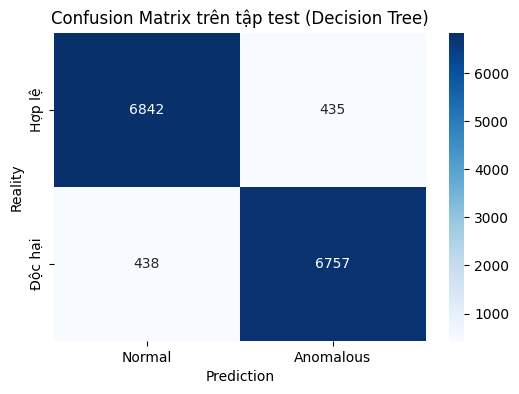

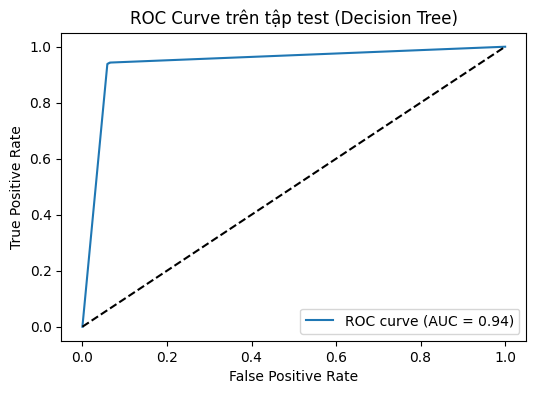

In [7]:
def train_test_decision_tree():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = decision_tree(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Decision Tree", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Decision Tree", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Decision Tree', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Decision Tree', y_test_proba)
    
    
train_test_decision_tree()

In [8]:
def train_test_linear():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = linear_svc(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("LinearSVC", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("LinearSVC", y_test, y_test_pred, y_test_proba, "Test Set")
   
    heatmap('Linear SVC', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Linear SVC', y_test_proba)

Training time (s):15.68
Prediction time (s):0.15
✅ Mô hình đã được lưu tại: linearsvc.pkl

Validation on Tập val:
Accuracy: 0.9475
Test Error (1-Accuracy): 0.0525
Precision: 0.9623
Recall: 0.9323
F1-Score: 0.9471
ROC-AUC: 0.9895
Log Loss: 0.1305

Validation on Tập test:
Accuracy: 0.9482
Test Error (1-Accuracy): 0.0518
Precision: 0.9548
Recall: 0.9402
F1-Score: 0.9475
ROC-AUC: 0.9890
Log Loss: 0.1289
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9475
Test Error (1-Accuracy): 0.0525
Precision: 0.9623
Recall: 0.9323
F1-Score: 0.9471
ROC-AUC: 0.9895
Log Loss: 0.1305

Validation on Test Set:
Accuracy: 0.9482
Test Error (1-Accuracy): 0.0518
Precision: 0.9548
Recall: 0.9402
F1-Score: 0.9475
ROC-AUC: 0.9890
Log Loss: 0.1289


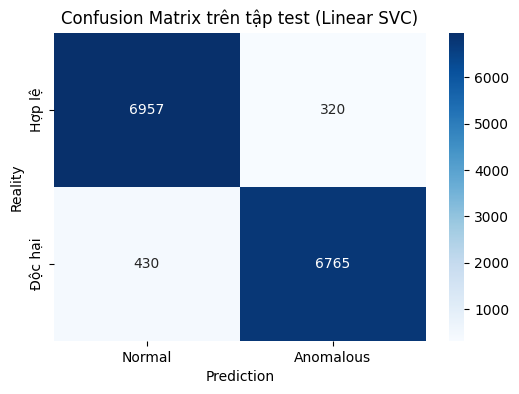

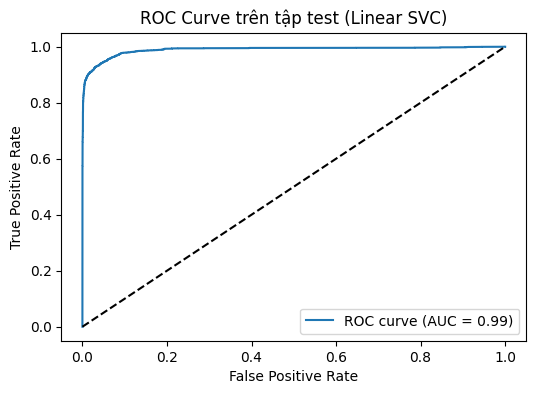

In [9]:
train_test_linear()

Training time (s):0.03
Prediction time (s):34.65
✅ Mô hình đã được lưu tại: knn.pkl

Validation on Tập val:
Accuracy: 0.9501
Test Error (1-Accuracy): 0.0499
Precision: 0.9477
Recall: 0.9535
F1-Score: 0.9506
ROC-AUC: 0.9860
Log Loss: 0.3573

Validation on Tập test:
Accuracy: 0.9460
Test Error (1-Accuracy): 0.0540
Precision: 0.9386
Recall: 0.9539
F1-Score: 0.9462
ROC-AUC: 0.9866
Log Loss: 0.3025
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9501
Test Error (1-Accuracy): 0.0499
Precision: 0.9477
Recall: 0.9535
F1-Score: 0.9506
ROC-AUC: 0.9860
Log Loss: 0.3573

Validation on Test Set:
Accuracy: 0.9460
Test Error (1-Accuracy): 0.0540
Precision: 0.9386
Recall: 0.9539
F1-Score: 0.9462
ROC-AUC: 0.9866
Log Loss: 0.3025


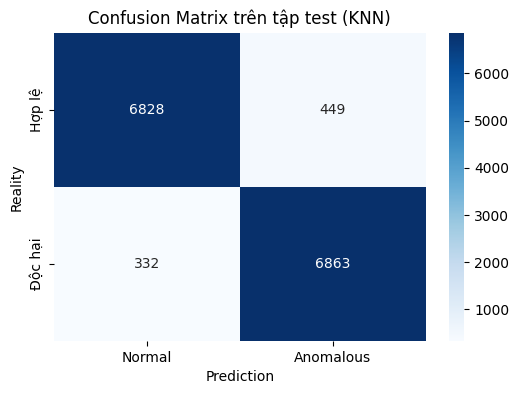

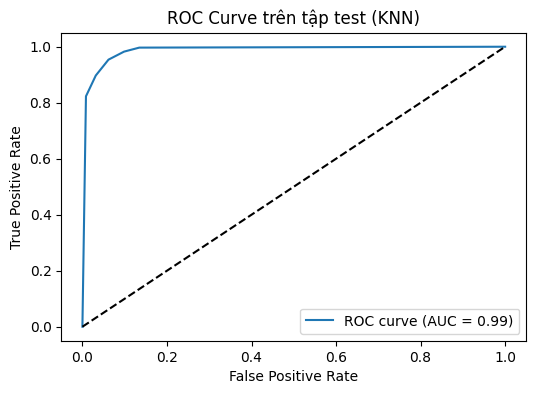

In [10]:

def train_test_knn():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = knn(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("KNN", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("KNN", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('KNN', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'KNN', y_test_proba)

train_test_knn()

Training time (s):0.27
Prediction time (s):0.32
✅ Mô hình đã được lưu tại: naive_bayes_model.pkl

Validation on Tập val:
Accuracy: 0.8078
Test Error (1-Accuracy): 0.1922
Precision: 0.8558
Recall: 0.7438
F1-Score: 0.7959
ROC-AUC: 0.9097
Log Loss: 6.6701

Validation on Tập test:
Accuracy: 0.8041
Test Error (1-Accuracy): 0.1959
Precision: 0.8444
Recall: 0.7429
F1-Score: 0.7904
ROC-AUC: 0.9043
Log Loss: 6.7814
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.8078
Test Error (1-Accuracy): 0.1922
Precision: 0.8558
Recall: 0.7438
F1-Score: 0.7959
ROC-AUC: 0.9097
Log Loss: 6.6701

Validation on Test Set:
Accuracy: 0.8041
Test Error (1-Accuracy): 0.1959
Precision: 0.8444
Recall: 0.7429
F1-Score: 0.7904
ROC-AUC: 0.9043
Log Loss: 6.7814


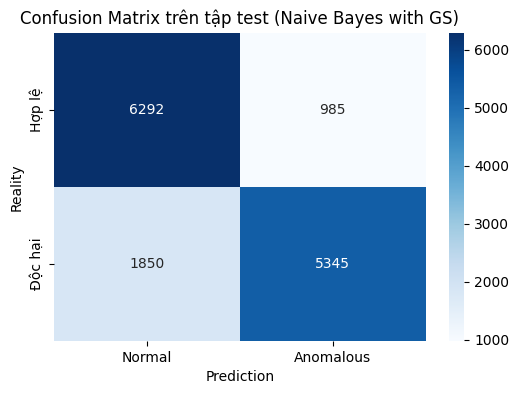

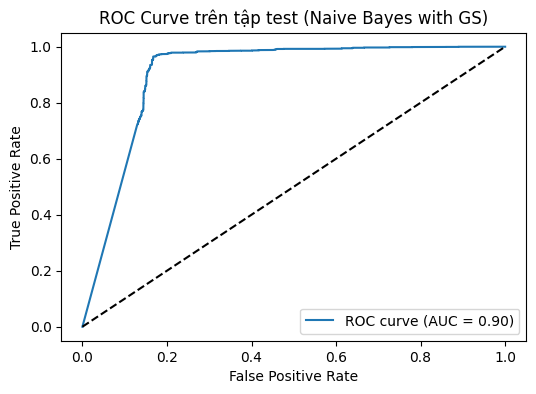

In [11]:

def train_test_naive_bayes():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = naive_bayes_opt_gs(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Naive Bayes", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Naive Bayes", y_test, y_test_pred, y_test_proba, "Test Set")
    heatmap('Naive Bayes with GS', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Naive Bayes with GS', y_test_proba)
train_test_naive_bayes()

CSIC dataset
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Tranining time (s): 322.91

Best hyperparameter : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best recall on cross-validation: 0.9918695317367261
Prediction time (s): 0.61
✅ Mô hình đã được lưu tại: random_forest_grids.pkl

Validation on Tập val:
Accuracy: 0.9453
Test Error (1-Accuracy): 0.0547
Precision: 0.9080
Recall: 0.9919
F1-Score: 0.9481
ROC-AUC: 0.9948
Log Loss: 0.1212

Validation on Tập test:
Accuracy: 0.9396
Test Error (1-Accuracy): 0.0604
Precision: 0.8974
Recall: 0.9919
F1-Score: 0.9423
ROC-AUC: 0.9940
Log Loss: 0.1258
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9453
Test Error (1-Accuracy): 0.0547
Precision: 0.9080
Recall: 0.9919
F1-Score: 0.9481
ROC-AUC: 0.9948
Log Loss: 0.1212

Validation on Test Set:
Accuracy: 0.9396
Test Error (1-Accuracy): 0.0604
Precision: 0.8974
Recall: 0.9919
F1-Score: 0.9423
ROC-AUC: 0.9940
Log Loss: 0.1258


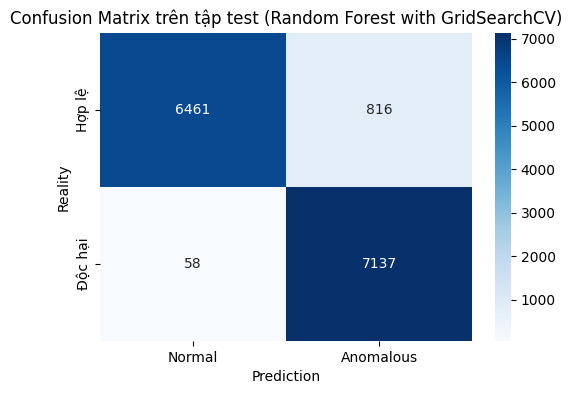

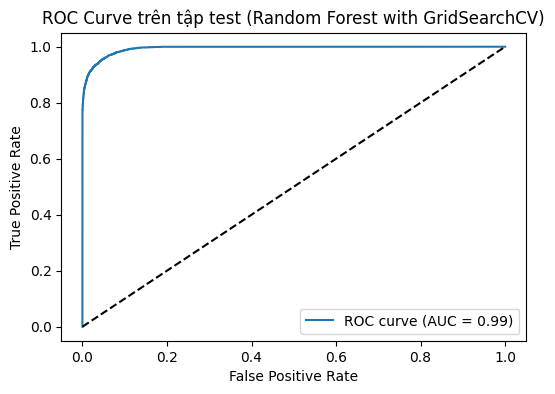

In [12]:
def train_test_rf():
    print("CSIC dataset")
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = random_forest_grid_search(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("Random Forest", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("Random Forest", y_test, y_test_pred, y_test_proba, "Test Set")
    # print("ECML dataset")
    # y_test_pred_1, y_test_proba_1, y_val_pred_1, y_val_proba_1, best_model = random_forest_grid_search(X_train_1, y_train_1, X_test_1, X_val_1)
    # print_metrics("Random Forest", y_val_1, y_val_pred_1, y_val_proba_1, "Validation Set")
    # print_metrics("Random Forest", y_test_1, y_test_pred_1, y_test_proba_1, "Test Set")
    heatmap('Random Forest with GridSearchCV', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'Random Forest with GridSearchCV', y_test_proba)
train_test_rf()

Training time (s):7.14
Prediction time (s):0.20
✅ Mô hình đã được lưu tại: xgboost.pkl

Validation on Tập val:
Accuracy: 0.9470
Test Error (1-Accuracy): 0.0530
Precision: 0.9142
Recall: 0.9875
F1-Score: 0.9494
ROC-AUC: 0.9945
Log Loss: 0.1084

Validation on Tập test:
Accuracy: 0.9388
Test Error (1-Accuracy): 0.0612
Precision: 0.9016
Recall: 0.9844
F1-Score: 0.9412
ROC-AUC: 0.9936
Log Loss: 0.1151
📊 Kết quả đã được lưu vào: model_results.csv

Validation on Validation Set:
Accuracy: 0.9470
Test Error (1-Accuracy): 0.0530
Precision: 0.9142
Recall: 0.9875
F1-Score: 0.9494
ROC-AUC: 0.9945
Log Loss: 0.1084

Validation on Test Set:
Accuracy: 0.9388
Test Error (1-Accuracy): 0.0612
Precision: 0.9016
Recall: 0.9844
F1-Score: 0.9412
ROC-AUC: 0.9936
Log Loss: 0.1151


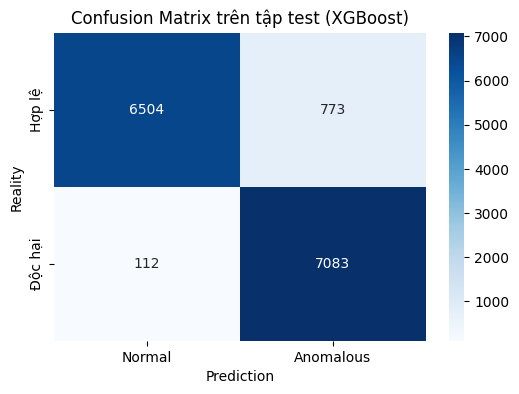

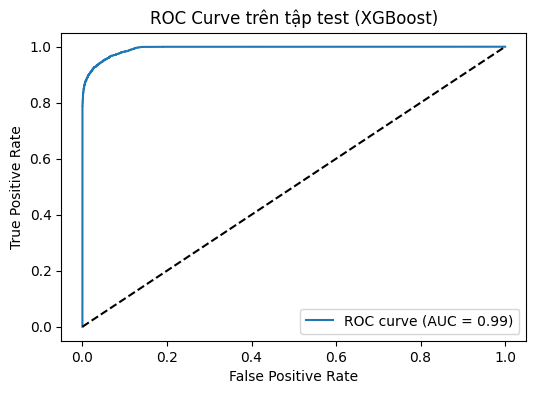

In [13]:
def train_test_xgboost():
    y_test_pred, y_test_proba, y_val_pred, y_val_proba, best_model = xgboost(X_train, y_train, X_test, X_val, y_val, y_test)
    print_metrics("XGboot", y_val, y_val_pred, y_val_proba, "Validation Set")
    print_metrics("XGboot", y_test, y_test_pred, y_test_proba, "Test Set")   
    heatmap('XGBoost', y_test, y_test_pred)
    plot_roc_curve(y_test, y_test_pred, 'XGBoost', y_test_proba)
train_test_xgboost()

   Train Type   Dataset  Accuracy  Test Error  Precision    Recall  F1-Score  \
0          ML   Tập val  0.940937    0.059063   0.947740  0.934280  0.940962   
1          ML  Tập test  0.939677    0.060323   0.939516  0.939124  0.939320   
2          ML   Tập val  0.947531    0.052469   0.962346  0.932331  0.947100   
3          ML  Tập test  0.948176    0.051824   0.954834  0.940236  0.947479   
4          ML   Tập val  0.950056    0.049944   0.947689  0.953495  0.950583   
5          ML  Tập test  0.946034    0.053966   0.938594  0.953857  0.946164   
6          ML   Tập val  0.807800    0.192200   0.855815  0.743804  0.795888   
7          ML  Tập test  0.804104    0.195896   0.844392  0.742877  0.790388   
8          ML   Tập val  0.945286    0.054714   0.907979  0.991924  0.948097   
9          ML  Tập test  0.939608    0.060392   0.897397  0.991939  0.942303   
10         ML   Tập val  0.946970    0.053030   0.914153  0.987469  0.949398   
11         ML  Tập test  0.938847    0.0

C:\Users\Acer\AppData\Local\Temp\ipykernel_22836\397119161.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')


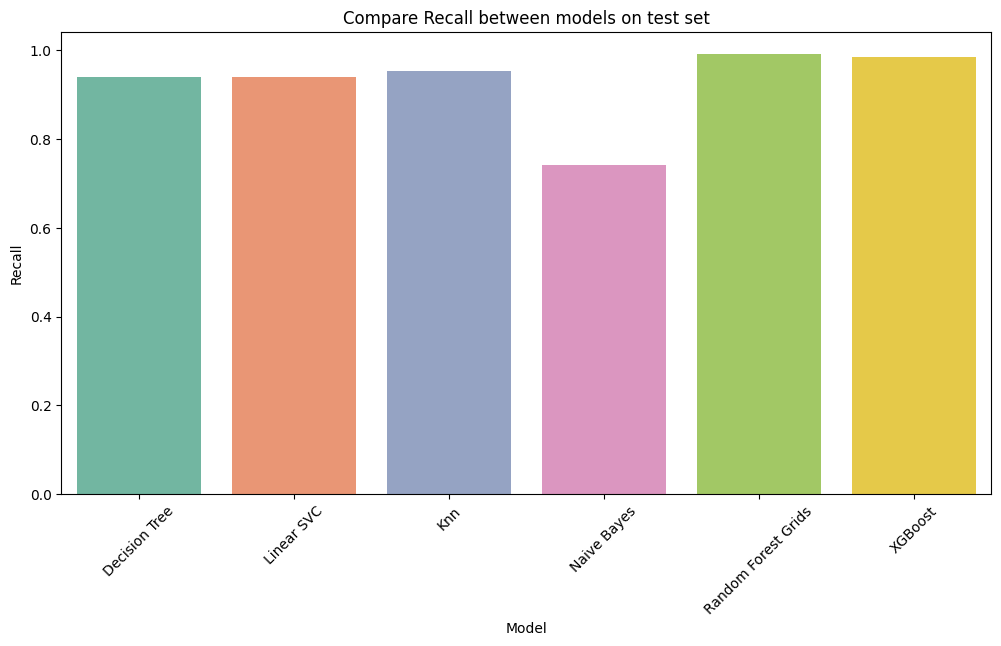

In [19]:
results_df = pd.read_csv('model_results.csv')
print(results_df)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='Recall', palette='Set2')
plt.title('Compare Recall between models on test set')
plt.xticks(rotation=45)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_22836\116253463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')


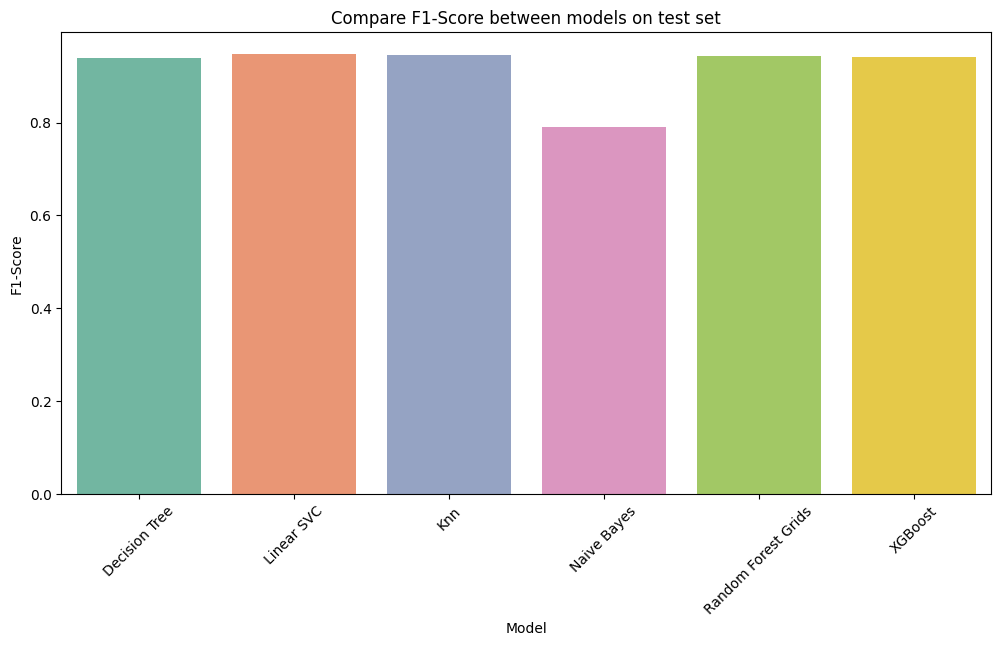

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df[results_df['Dataset'] == 'Tập test'], x='Model', y='F1-Score', palette='Set2')
plt.title('Compare F1-Score between models on test set')
plt.xticks(rotation=45)
plt.show()

In [25]:
# All values
test_df = results_df[results_df['Dataset'] == 'Tập test'][[
    'Model', 'Accuracy', 'Test Error', 'Precision', 'Recall',
    'F1-Score', 'ROC-AUC', 'Log Loss', 'Training Time', 'Prediction Time'
]]

# Table
print("\n Compare all values:")
display(test_df) 


 Compare all values:


,Model,Accuracy,Test Error,Precision,Recall,F1-Score,ROC-AUC,Log Loss,Training Time,Prediction Time
1,Decision Tree,0.939677,0.060323,0.939516,0.939124,0.939320,0.941857,2.086614,21.552191,0.059582
3,Linear SVC,0.948176,0.051824,0.954834,0.940236,0.947479,0.989024,0.128949,15.676665,0.150085
5,Knn,0.946034,0.053966,0.938594,0.953857,0.946164,0.986646,0.302501,0.028873,34.652355
7,Naive Bayes,0.804104,0.195896,0.844392,0.742877,0.790388,0.904319,6.781382,0.267895,0.318061
9,Random Forest Grids,0.939608,0.060392,0.897397,0.991939,0.942303,0.993977,0.125769,322.906723,0.610933
11,XGBoost,0.938847,0.061153,0.901604,0.984434,0.941200,0.993614,0.115138,7.138681,0.200441


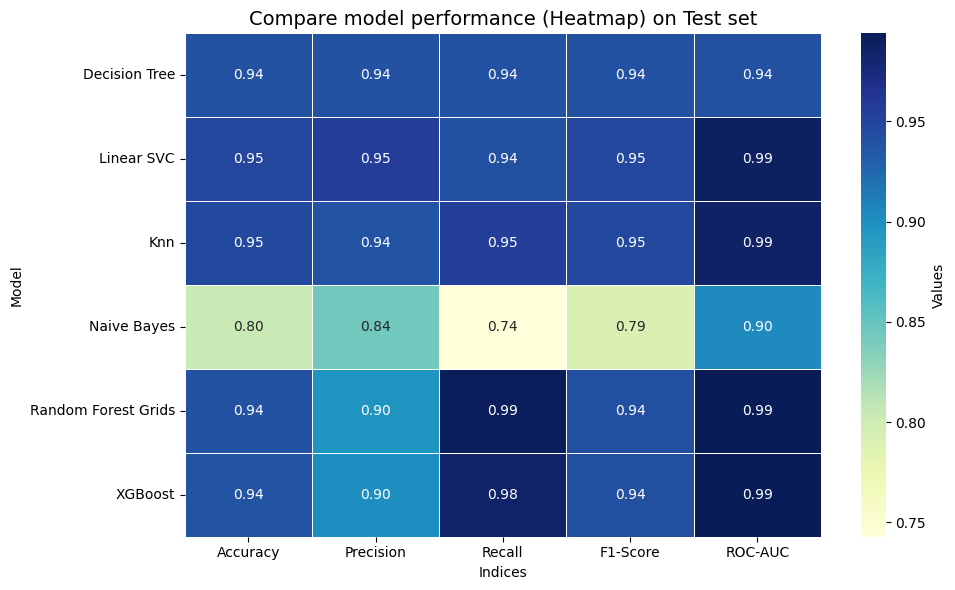

In [27]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
heatmap_data = test_df.set_index('Model')[metrics]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Compare model performance (Heatmap) on Test set', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

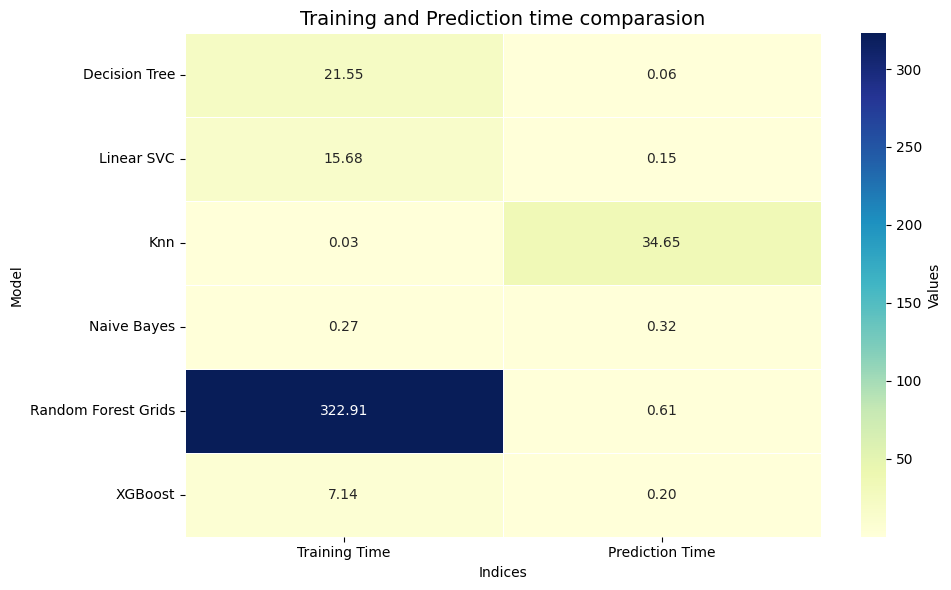

In [30]:
results_df = pd.read_csv('model_results.csv')

# Test set filter
test_df = results_df[results_df['Dataset'] == 'Tập test']

# Select indices
metrics = ['Training Time', 'Prediction Time']
heatmap_data = test_df.set_index('Model')[metrics]


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Values'}, linewidths=0.5)

plt.title('Training and Prediction time comparasion', fontsize=14)
plt.xlabel('Indices')
plt.ylabel('Model')
plt.tight_layout()

In [14]:
import shutil
import os

def delete_pycache(start_path='.'):
    for root, dirs, files in os.walk(start_path):
        for d in dirs:
            if d == '__pycache__':
                full_path = os.path.join(root, d)
                try:
                    shutil.rmtree(full_path)
                    print(f"Deleted: {full_path}")
                except Exception as e:
                    print(f"Error deleting {full_path}: {e}")

# Gọi hàm
delete_pycache()

Deleted: .\config_module\__pycache__
Deleted: .\data\__pycache__
Deleted: .\models\__pycache__
Deleted: .\preprocessing\__pycache__
